**Examples of Vector Spaces**

-  $\mathbb{R}^n$ with standard vector addition and scalar multiplication
- The space $ M_{m \times n}$ of all $m \times n$ matrices
- The space of polynomials of degree $\leq n $
- The space of real-valued continuous functions $f: \mathbb{R} \to \mathbb{R}$

**Span and Linear Independence**

- The **span** of a set of vectors  $\{ v_1, v_2, ..., v_k \}$ is the set of all linear combinations:

$$\text{Span}(v_1, \dots, v_k) = \{c_1v_1 + c_2v_2 + \dots + c_kv_k \mid c_i \in \mathbb{R}\}
$$

- A set of vectors is \textbf{linearly independent} if the equation

$$c_1v_1  +  c_2v_2  + ...  +  c_kv_k = 0$$

     has only the trivial solution  $(c_1 = c_2 = ... = c_k = 0)$.
   

**Linear Dependence**

- $\mathbb{R}^3$ Example:

the set of vectors $\{ (1,2,3), (4,5,6), (7,8,9) \}$  is linearly independent because:


$det = \begin{bmatrix} 1 & 2 & 3 \\ 4 & 5 & 6 \\ 7 & 8 & 9       \end{bmatrix}=0$

- $\mathbb{R}^2$ Example:

Given the vectors:

  $v_1 = \begin{bmatrix} 1 \\ 0 \end{bmatrix}, \quad
   v_2 = \begin{bmatrix} 0 \\ 1 \end{bmatrix}, \quad
   v_3 = \begin{bmatrix} 1 \\ 1 \end{bmatrix}$
   
   Here, $v_3$ is dependent on $v_1$, $v_2$, but ${v_1,v_2}$ already spans $\mathbb{R}^2$.


**Basis and Dimension**

- Basis: A linearly independent set that spans the entire space.

- Dimension: Number of vectors in a basis.

  - Example (finite): $V = \mathbb{R}^3 = \{ (x, y, z) \mid x, y, z \in \mathbb{R} \}$, basis= $\{ (1,0,0), (0,1,0), (0,0,1) \}$, dimension = 3.
  - Example (infinite): Polynomials  $V = P(\mathbb{R}) = \{ a_0 + a_1x + a_2x^2 + a_3x^3 + \dots \mid a_i \in \mathbb{R} \}$, basis= $\{ 1, x, x^2, x^3, \dots \}$, dimension is infinite.
  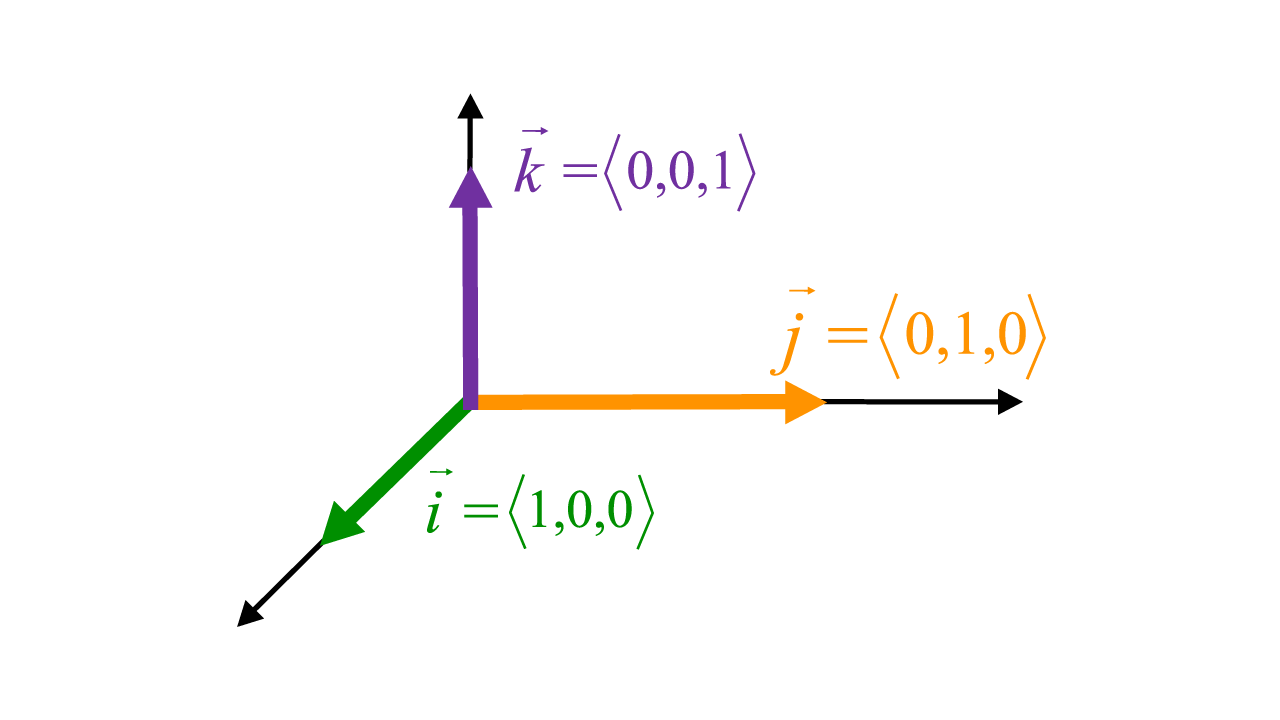

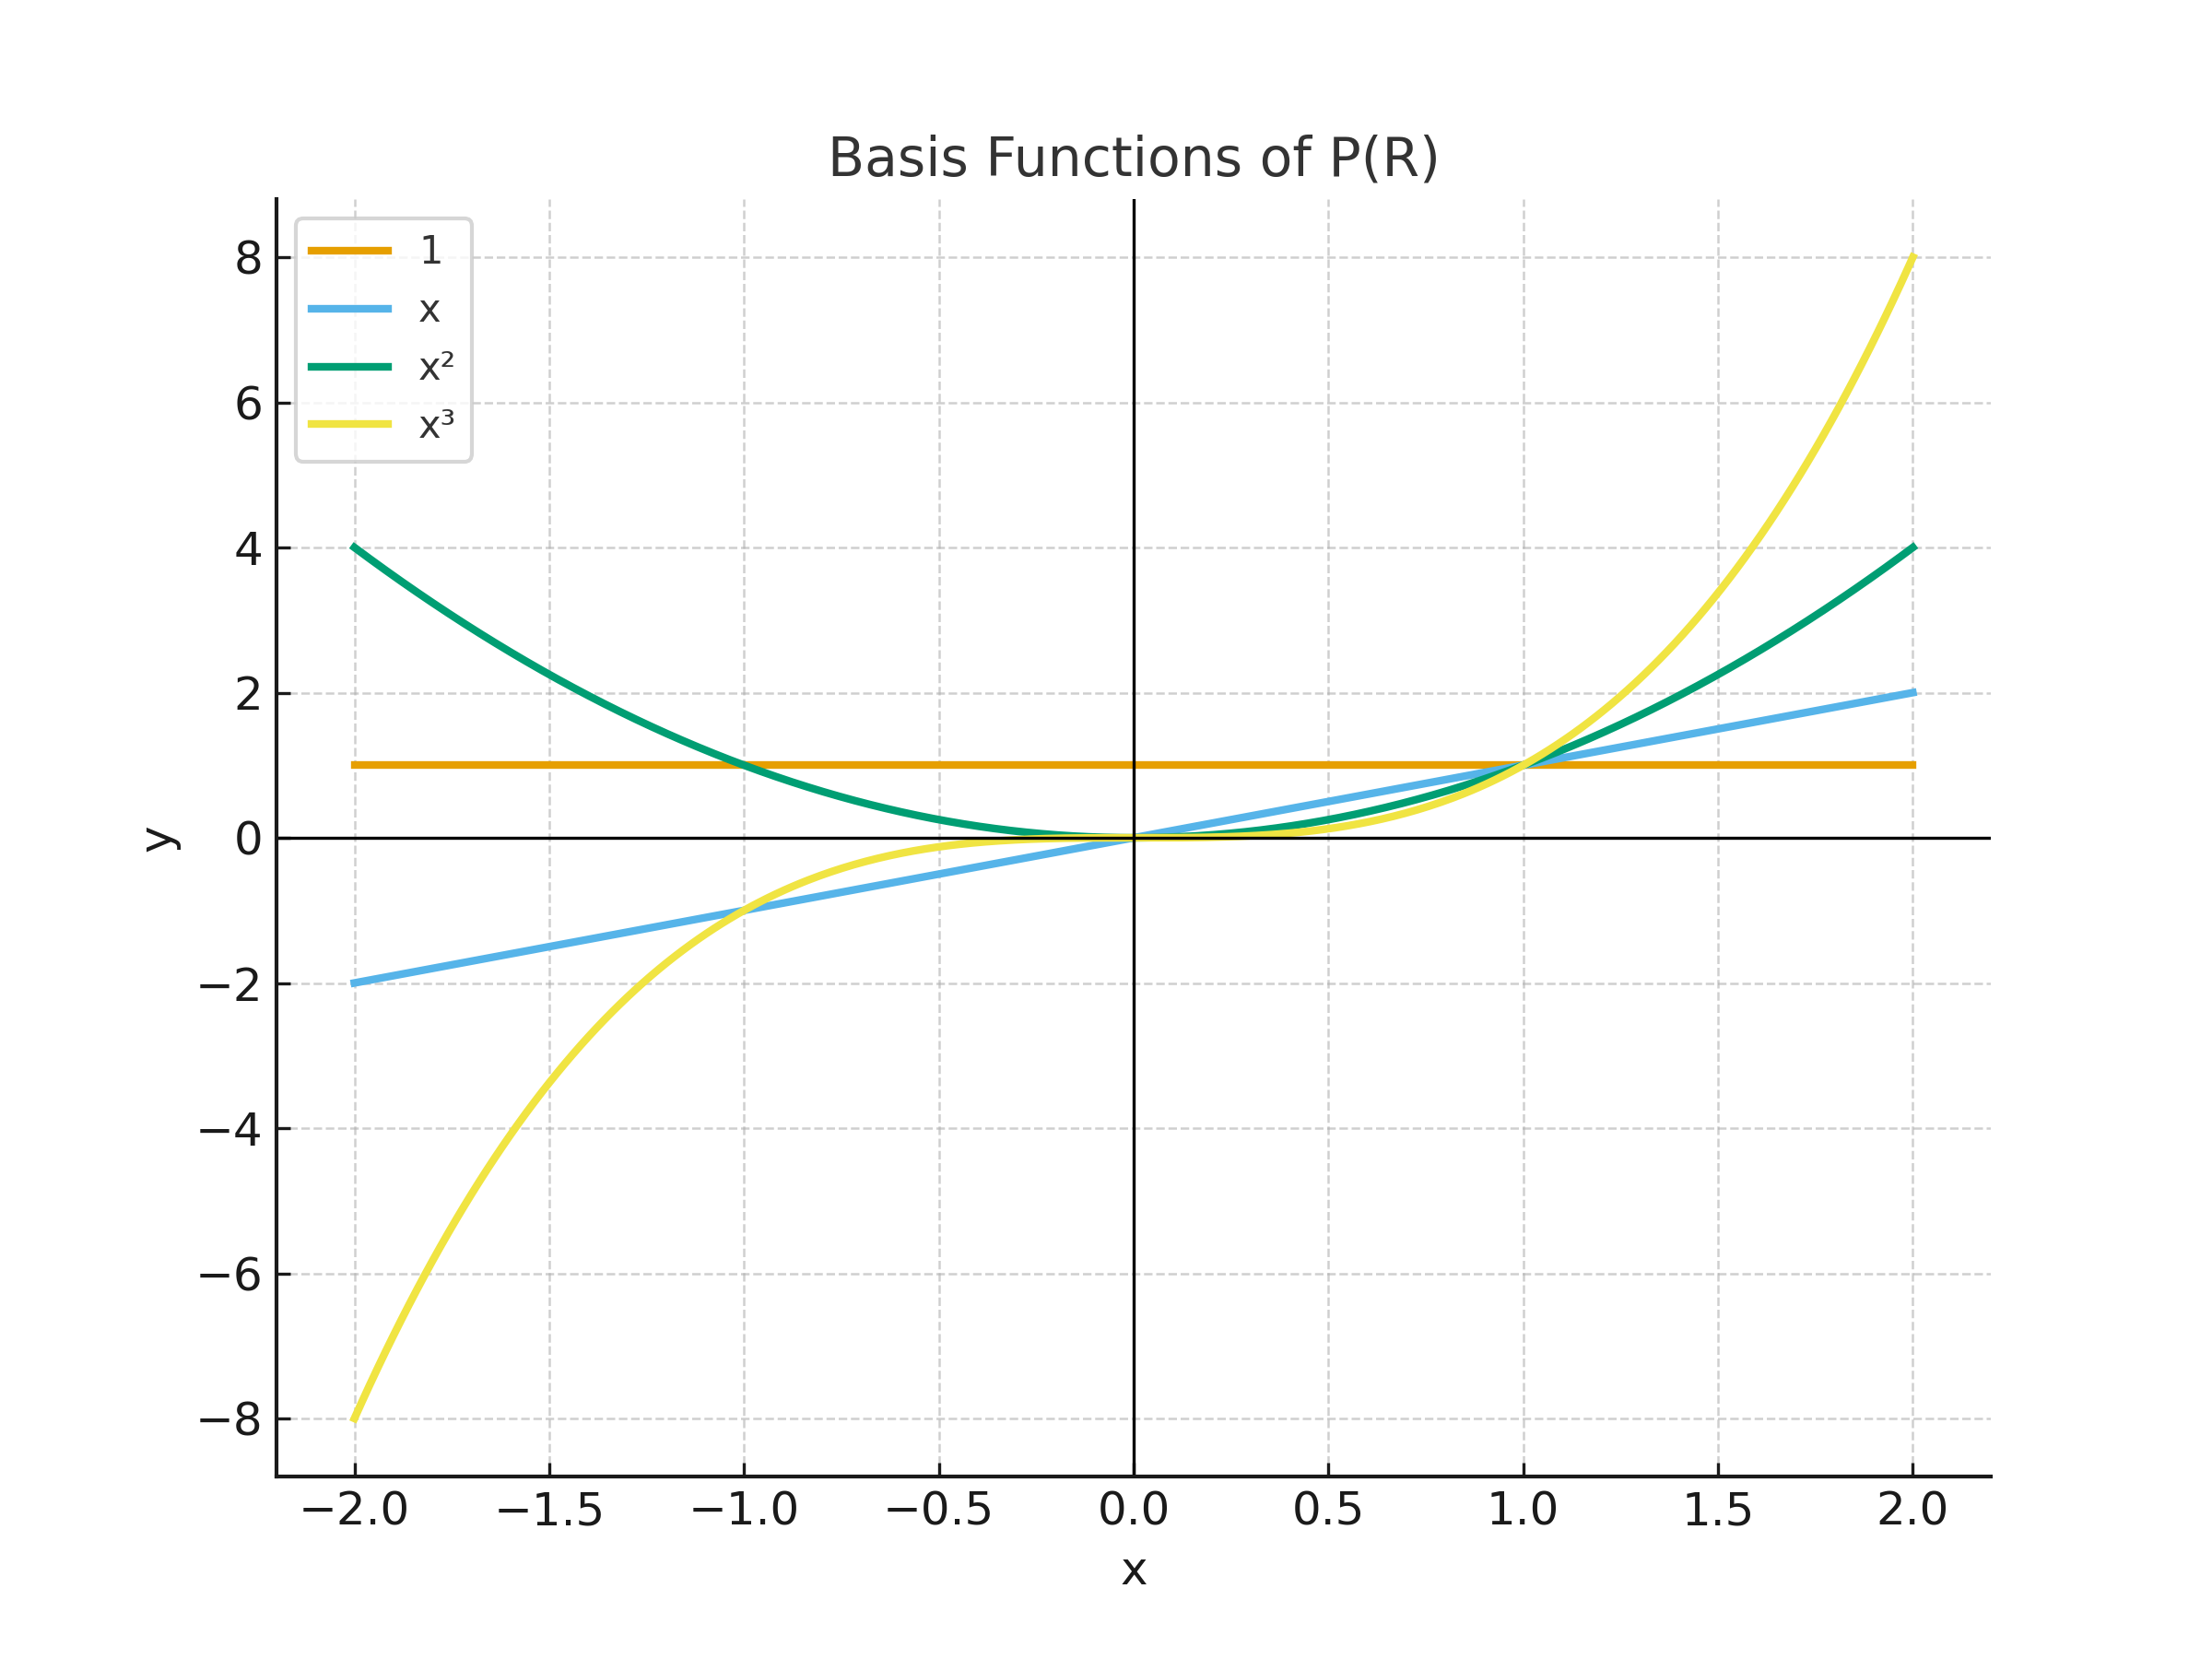

**Fundamental Subspaces**

   Given a matrix $A$:

- **Column Space** (Image): the span of the columns of $ A $.
- **Row Space**: the span of the rows of $ A $.
- **Null Space** (Kernel): Solution of $Ax = 0$.
- **Left Null Space** (Coimage): Solution of $A^T y = 0$.

**Rank and Dependence**

- Lemma: Any $k>n$ vectors in $\mathbb{R}^n$ are dependent.
- Proposition:
   - A set of $k$ vectors in $\mathbb{R}^n$ is independent $\iff$ matrix rank $ = k(k\leq n)$
   - A set spans $\mathbb{R}^n$ $\iff$ matrix rank $ = n(k\geq n)$ 

In [4]:
import numpy as np

def check_matrix_properties():
    """
    Ask the user for a matrix (rows x cols) and then
    check linear dependence, independence, and spanning
    based on the rank.
    """
    # --- Get dimensions of the matrix ---
    n = int(input("Enter number of rows n (dimension of space R^n): "))
    k = int(input("Enter number of columns k (number of vectors): "))

    # --- Prompt the user to enter the matrix entries row by row ---
    print("Enter the matrix entries row by row (space separated):")
    A = []
    for i in range(n):
        # Ask for each row and split into float numbers
        row = list(map(float, input(f"Row {i+1}: ").split()))
        if len(row) != k:
            raise ValueError("Each row must have exactly k entries.")
        A.append(row)
    A = np.array(A)

    # --- Compute the rank of the matrix ---
    rank = np.linalg.matrix_rank(A)

    # --- Display the matrix and its rank ---
    print("\nMatrix A:")
    print(A)
    print("Rank(A):", rank)

    # --- Check linear dependence / independence ---
    if k > n:
        # More vectors than the dimension => automatically dependent
        print("\nBy lemma: k > n, so the vectors are linearly dependent.")
    else:
        if rank < k:
            # Rank less than number of vectors => dependent
            print("\nThe vectors are linearly dependent (rank < k).")
        else:
            # Full rank equals number of vectors => independent
            print("\nThe vectors are linearly independent (rank = k).")

    # --- Check whether the vectors span R^n ---
    if rank == n:
        print("The vectors span R^n (rank = n).")
    else:
        print("The vectors do NOT span R^n (rank < n).")

    # --- Optionally test whether a given vector b lies in the span ---
    ans = input("\nDo you want to test if a vector b is in the span? (y/n): ")
    if ans.lower() == 'y':
        # Ask the user to enter vector b
        b = list(map(float, input(f"Enter vector b of length {n} (space separated): ").split()))
        if len(b) != n:
            raise ValueError("Vector b must have length n.")
        b = np.array(b)

        # Solve A c = b in least squares sense
        c, residuals, rank2, s = np.linalg.lstsq(A, b, rcond=None)

        # Check if the computed combination exactly reproduces b
        if np.allclose(A @ c, b):
            print("b is in the span of the given vectors.")
            print("One possible combination c:", c)
        else:
            print("b is NOT in the span of the given vectors.")

# Run the function:
check_matrix_properties()


Enter number of rows n (dimension of space R^n): 3
Enter number of columns k (number of vectors): 3
Enter the matrix entries row by row (space separated):
Row 1: 1 4 7
Row 2: 2 5 8
Row 3: 3 6 9

Matrix A:
[[1. 4. 7.]
 [2. 5. 8.]
 [3. 6. 9.]]
Rank(A): 2

The vectors are linearly dependent (rank < k).
The vectors do NOT span R^n (rank < n).

Do you want to test if a vector b is in the span? (y/n): y
Enter vector b of length 3 (space separated): 1 2 3
b is in the span of the given vectors.
One possible combination c: [ 0.83333333  0.33333333 -0.16666667]


**conclusion**

- Vector spaces unify diverse structures (Rn, polynomials, matrices, functions).

- Core operations: addition, scalar multiplication, span, linear independence.

- Basis + Dimension provide the framework to describe a space.

- Rank connects independence, dependence, and spanning.

- Applications: linear systems, differential equations, data science, physics.